In [0]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Flower 5 NPY Files/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
os.listdir(root_path)

['train_data.npy', 'train_labels.npy']

In [0]:
import numpy as np
TRAIN_DATA = np.load(os.path.join(root_path,"train_data.npy"))
TRAIN_LABELS = np.load(os.path.join(root_path, "train_labels.npy"))
                     

In [0]:
print(TRAIN_DATA.shape)
print(TRAIN_LABELS.shape)

(3670, 150, 150, 3)
(3670, 5)


In [0]:
X_train = TRAIN_DATA.astype('float32')
X_train /= 255

print('X_train:', X_train.shape)
print('Y_train:', TRAIN_LABELS.shape)

X_train: (3670, 150, 150, 3)
Y_train: (3670, 5)


In [0]:

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_train, TRAIN_LABELS, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(2569, 150, 150, 3)
(1101, 150, 150, 3)


In [0]:
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5)
print(X_test.shape)
print(X_val.shape)

(550, 150, 150, 3)
(551, 150, 150, 3)


In [0]:
from keras import Sequential, regularizers
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, Flatten

model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
#model.add(Dropout(0.3))
model.add(Dense(5, activation = 'softmax'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 74, 74, 32)        128       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 36, 36, 64)        256       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 34, 34, 64)        36928     
__________

In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

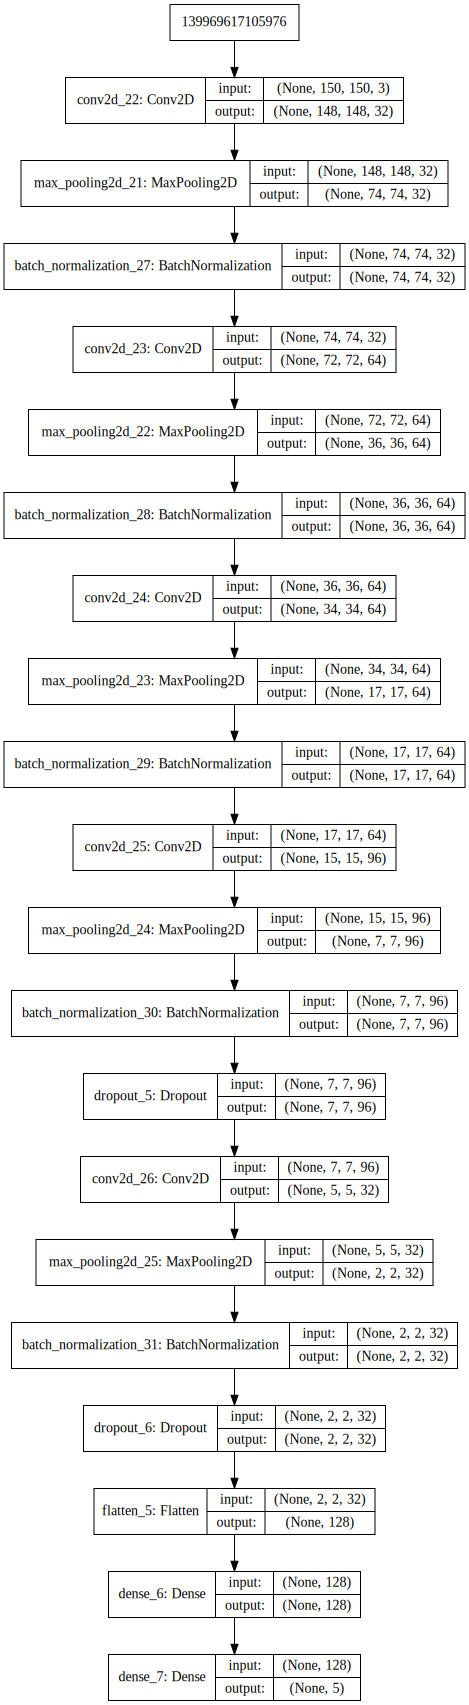

In [0]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
batch_size = 256
history = model.fit(X_train, Y_train, epochs=100, batch_size=batch_size, validation_data=(X_test, Y_test))

Train on 2569 samples, validate on 550 samples
Epoch 1/100
2569/2569 [==============================] - 5s 2ms/step - loss: 1.5794 - acc: 0.4196 - val_loss: 1.4591 - val_acc: 0.4800
Epoch 2/100
2569/2569 [==============================] - 2s 926us/step - loss: 1.2277 - acc: 0.5629 - val_loss: 1.3170 - val_acc: 0.5582
Epoch 3/100
2569/2569 [==============================] - 2s 909us/step - loss: 1.1526 - acc: 0.5889 - val_loss: 1.2633 - val_acc: 0.5655
Epoch 4/100
2569/2569 [==============================] - 2s 909us/step - loss: 1.0960 - acc: 0.6150 - val_loss: 1.1858 - val_acc: 0.5945
Epoch 5/100
2569/2569 [==============================] - 2s 909us/step - loss: 1.0274 - acc: 0.6376 - val_loss: 1.1349 - val_acc: 0.5964
Epoch 6/100
2569/2569 [==============================] - 2s 914us/step - loss: 0.9685 - acc: 0.6750 - val_loss: 1.2147 - val_acc: 0.5636
Epoch 7/100
2569/2569 [==============================] - 2s 912us/step - loss: 0.9321 - acc: 0.6800 - val_loss: 1.0837 - val_acc: 0.6

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


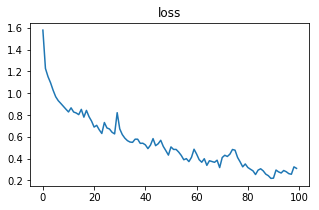

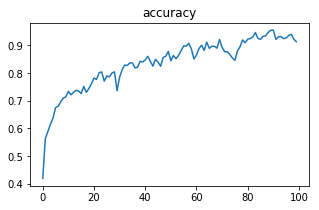

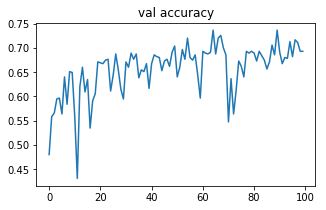

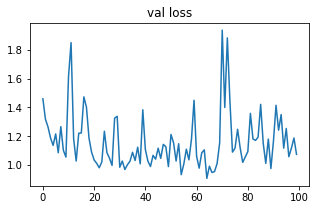

In [0]:
import matplotlib.pyplot as plt
print(history.epoch)
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'])
plt.title('accuracy');

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['val_acc'])
plt.title('val accuracy');

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['val_loss'])
plt.title('val loss');

In [0]:
res = model.evaluate(X_test, Y_test)

550/550 [==============================] - 1s 2ms/step


In [0]:
res

[1.2677658315138383, 0.7054545452378013]